# Неустойчивые орбиты вокруг точки $L_1$
в круговой ограниченной задаче трех тел

### Условие задачи


**Дано:**
- движение невесомого тела в системе из двух массивных тел, вращающихся относительно общего центра масс, описывается системой уравнений:

$\begin{cases}
\ddot{x} - 2\dot{y} = \frac{\partial{U}}{\partial{x}} \\
\ddot{y} + 2\dot{x} = \frac{\partial{U}}{\partial{y}} \\
\ddot{z} = \frac{\partial{U}}{\partial{z}} \\
U = \frac{1}{2} (x^2 + y^2) + \frac{\mu_1}{r_1} + \frac{\mu_2}{r_2} \\
r^2_1 = (x + \mu_2)^2 + y^2 + z^2 \\
r^2_2 = (x - \mu_1)^2 + y^2 + z^2
\end{cases}$

- методы Рунге-Кутты для интегрирования систем ОДУ первого порядка, рассмотренные на семинарах
- константы для системы уравнений и метод интегрирования необходимо выбрать самостоятельно в [таблице вариантов](https://docs.google.com/spreadsheets/d/1RvryyiQSz1TTAlwLxOuwmIAaZUZd2cdftZa7yHMPKBw/edit?usp=sharing) так, чтобы не было повторений
- алгоритм вычисления начальной скорости для неустойчивой орбиты вокруг $L_1$, рассмотренный на семинаре
- библиотека математических алгоритмов [Tracker Component Library](https://github.com/USNavalResearchLaboratory/TrackerComponentLibrary/blob/master/Mathematical_Functions/Differential_Equations/RungeKStep.m)
- модули `numba`, `numpy`, `matplotlib`


**Требуется:**
1. Реализовать обобщенный метод Рунге-Кутты на основе таблицы Бутчера для интегрирования систем ОДУ первого порядка:

    - функция для расчета одного шага размера $h$
    - функция для расчета $n$ шагов размера $h$ (1)
    - подготовить таблицу Бутчера из `Tracker Component Library` (определяется вариантом задания)


2. Реализовать алгоритм вычисления начальной скорости для неустойчивой орбиты вокруг $L_1$:

    - модификация функции (1) для досрочной остановки интегрирования при условии пересечения одной из плоскостей
    - функция для расчета начальной скорости $vy_0$ на основе метода бисекции для орбиты, заданной начальным положением $(x_0, 0, z_0)$ и условием ортогональности вектора скорости и плоскости $XOZ$ в начальный момент времени
    
        - $d$ = $90\%$ расстояния от $L_1$ до малого массивного тела 
        - $x_{left} = x_{L1} - d$ - координата левой плоскости, заданной уравнением $x = x_{left}$
        - $x_{right} = x_{L1} + d$ - координата правой плоскости, заданной уравнением $x = x_{right}$


3. Реализовать алгоритм вычисления начальных скоростей орбит, начальные состояния которых заданы на решетке:
    - $(x_0, z_0) \in [x_{min}, x_{max}] \times [z_{min}, z_{max}]$

        - $x_{min} = x_{L1} - d / 3$
        - $x_{max} = x_{L1} + d / 3$
        - $z_{min} = 0.0$
        - $z_{max} = d / 3$

    - количество узлов на решетке $N \times N$


4. Использовать `@njit`, `@cfunc`, `prange` из модуля `numba` для компиляции всех функций и распараллеливания функции расчета на решетке


5. Вычислить начальные скорости и константы Якоби на заданных решетках
    - $J = 2 U - v^2$ - формула для вычисления константы Якоби
    - $h = \pi / 180$ - шаг по времени `t`
    - $x_{L1}$ - координата точки L1 (см. материалы семинара)
    - $[-1.0, 1.0]$ - начальный отрезок для уточнения скоростей методом бисекции (вероятно для некоторых систем этот отрезок не подойдет)


6. Измерить время вычислений


7. Сохранить результаты вычислений в файлах `*.npy` (функцией `np.save`)


8. Построить цветовые карты рассчитанных величин (начальная скорость, константа Якоби):

    - карты должны строиться по сохраненным данным, чтобы отрисовку можно было запустить без повторного выполнения расчетов
    - засечки по осям должны соответствовать координатам $x, z$, где $x$ отсчитывается относительно $x_{L1}$
    - единицы измерений по осям - километры
    - оси должны быть подписаны
    - должен присутствовать `colorbar`
    - должен присутствовать заголовок рисунка


9. Задокументировать все реализованные функции


**Материалы:**
- [Методы Рунге-Кутты](https://ru.wikipedia.org/wiki/Метод_Рунге_—_Кутты)
- [Динамика Солнечной Системы](https://disk.yandex.ru/i/HfJaUW2Sm62td)
- [Tracker Component Library](https://github.com/USNavalResearchLaboratory/TrackerComponentLibrary/blob/master/Mathematical_Functions/Differential_Equations/RungeKStep.m)
- [Mapping of initial conditions for libration point orbits](https://www.dropbox.com/s/wafy1jaylclngbv/Aksenov_ASR.pdf?dl=0)


**Правила оценивания:**

- оценка за корректно выполненные расчеты на решетке размером $(N, N)$:
```
      i  =  1   2    3    4
    N(i) = 40  80  160  320
    g(i) =  1  16   33   50
```
    
- штрафы $p(j)$, баллов:
    - нет цветовых карт - 20
    - карты построены по временным данным (не сохраненным) - 20
    - не сохранены файлы с результатами вычислений - 20
    - нет документации функций - 20
    - не измерено время вычислений - 10
    - менее значимые недоработки - 10

- итоговая оценка за задание = $\sum_{i}g(i) - \sum_{j}{p(j)}$

In [25]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from scipy.optimize import newton
from time import time

In [26]:
from unstable_orbits import crtbp_ode, rk_nsteps, bisect, get_plane, preset_grid, compute_grid

### Runge-Kutta RK5(4)6M from Dormand and Prince
$\begin{cases}
\vec{k}_1 = \vec{f}(t_n, \vec{s}_n) \\
\vec{k}_2 = \vec{f}(t_n + c_2 h, \vec{s}_n + a_{2,1} h \vec{k}_1) \\
\vec{k}_3 = \vec{f}(t_n + c_3 h, \vec{s}_n + a_{3,1} h \vec{k}_1 + a_{3,2} h \vec{k}_2) \\
... \\
\vec{k}_s = \vec{f}(t_n + c_s h, \vec{s}_n + a_{s,1} h \vec{k}_1 + a_{s,2} h \vec{k}_2 + ... + a_{s,s-1} h \vec{k}_{s-1}) \\
\vec{s}_{n+1} = \vec{s}_n + h \sum_{i=1}^{s} b_i \vec{k_i}
\end{cases}
$

$
{\displaystyle {\begin{array}{c|ccccc}0&&&&&\\c_{2}&a_{21}&&&&\\c_{3}&a_{31}&a_{32}&&&\\\vdots &\vdots &\vdots &\ddots &&\\c_{s}&a_{s1}&a_{s2}&\dots &a_{ss-1}&\\\hline &b_{1}&b_{2}&\dots &b_{s-1}&b_{s}\end{array}}}
$

### Testing functions with existing examples

In [4]:
mu2 = 2.44708063387211e-06
mu1 = 1 - mu2
R = 107602444
mc = np.array([mu2])

def g(x, mc):
    s = np.array([x, 0., 0., 0., 0., 0.])
    return crtbp_ode(0., s, mc)[3]

xL1 = newton(g, 0.75 * mu1, args=(mc,), tol=1e-16)

(mu1 - xL1) * R

1002241.6656083608

In [5]:
d = (mu1 - xL1) * 0.9
xmin = xL1 - d / 3
xmax = xL1 + d / 3
h = np.pi / 180

s0 = np.zeros(6)
s0[[0, 2, 4]] = xL1 + d * 0.1, d * 0.1, 0.1

arr0 = rk_nsteps(crtbp_ode, 0., s0, h, mc, 500)

s0 = np.zeros(6)
s0[[0, 2, 4]] = xL1 + d * 0.1, d * 0.1, -0.1

arr1 = rk_nsteps(crtbp_ode, 0., s0, h, mc, 500)

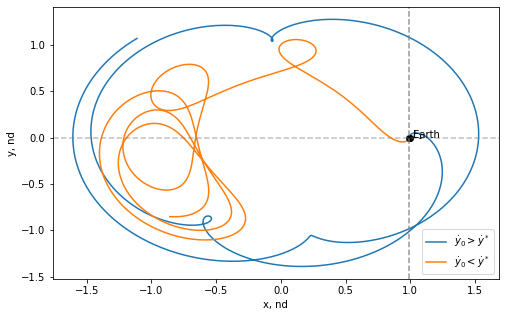

In [6]:
# График на плоскости XOY

plt.figure(figsize=(8, 5))

# траектории
plt.plot(arr0[:, 1], arr0[:, 2], label='$\dot{y}_0 > \dot{y}^*$')
plt.plot(arr1[:, 1], arr1[:, 2], label='$\dot{y}_0 < \dot{y}^*$')

# точка L1
plt.plot(xL1, 0., 'ok')
plt.text(xL1, 0., ' $L_1$')

# Земля
plt.plot(mu1, 0., 'ok')
plt.text(mu1, 0., ' Earth')

# Плоскости
plt.axvline(xmin, ls='--', color='gray', alpha=0.5)
plt.axvline(xmax, ls='--', color='gray', alpha=0.5)

# Ось OX
plt.axhline(0., ls='--', color='gray', alpha=0.5)

plt.legend()

plt.xlabel('x, nd')
plt.ylabel('y, nd')
plt.show()

In [7]:
import warnings
warnings.simplefilter('ignore')

In [10]:
pl = np.array([xmin, xmax])
s0 = np.zeros(6)
s0[[0, 2]] = xL1 + d * 0.1, d * 0.1

vy_saddle = bisect(get_plane, -0.02, 0.02, args=(crtbp_ode, s0, h, mc, 100000, pl), xtol=1e-16)
vy_saddle

-0.005078891690579183

In [12]:
%%timeit
bisect(get_plane, -1, 1, args=(crtbp_ode, s0, h, mc, 100000, pl), xtol=1e-12)

28 ms ± 497 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Computation for a grid of NxN start points

In [27]:
d = (mu1 - xL1) * 0.9
xmin = xL1 - d / 3
xmax = xL1 + d / 3
zmin = 0.
zmax = d / 3
pl = np.array([xmin, xmax])
h = np.pi / 180
Ns = [40, 80, 160, 320]

In [28]:
nb.set_num_threads(8)

In [29]:
N = 20 # 40 80 160 320

speed_label = f'speed_{N}'
jacobi_label = f'jacobi_{N}'
grid = preset_grid(xmin, xmax, zmin, zmax, N)
start = time()
speeds, jacobis = compute_grid(crtbp_ode, grid, h, mc, 100000, pl)
np.save(f'{speed_label}.npy', speeds)
np.save(f'{jacobi_label}.npy', jacobis)

f = open('compute_time.txt', 'a')
f.write(f'{time() - start} seconds elapased for {N}x{N} grid')
f.close()

In [30]:
def plot(N):
    """Helper function for plotting heatmaps of speed and Jacobi constants"""
    xs = np.arange(xmin, xmax, (xmax - xmin) / N)
    zs = np.arange(zmin, zmax, (zmax - zmin) / N)
    grid = preset_grid(xmin, xmax, zmin, zmax, N)
    speed_label = f'speed_{N}'
    jacobi_label = f'jacobi_{N}'
    speeds = np.load(f'{speed_label}.npy')
    jacobis = np.load(f'{jacobi_label}.npy')
    X, Z = R * grid[:, :, 0] - xL1, R * grid[:, :, 2]

    fig, ax = plt.subplots(figsize=(18, 7), ncols=2, nrows=1)
    pic = ax[0].pcolormesh(X, Z, speeds, cmap='jet')
    plt.colorbar(pic, ax=ax[0])
    ax[0].set_xlabel('Shift by X in KM from L1')
    ax[0].set_ylabel('Shift by Z in KM from L1')
    pic = ax[1].pcolormesh(X, Z, jacobis, cmap='jet')
    plt.colorbar(pic, ax=ax[1])
    ax[1].set_xlabel('Shift by X in KM from L1')
    ax[1].set_ylabel('Shift by Z in KM from L1')
    plt.suptitle(f'Start speed to stay around L1 with N = {N}')
    plt.show()

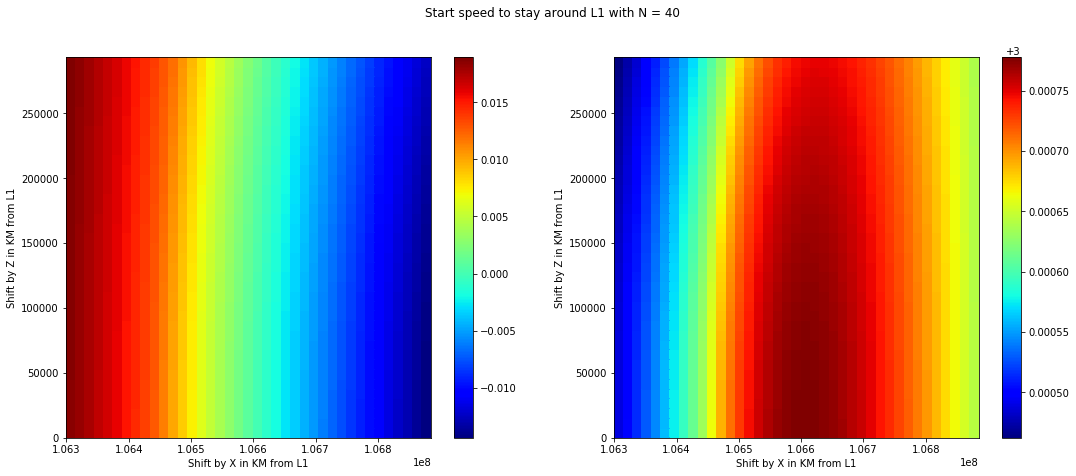

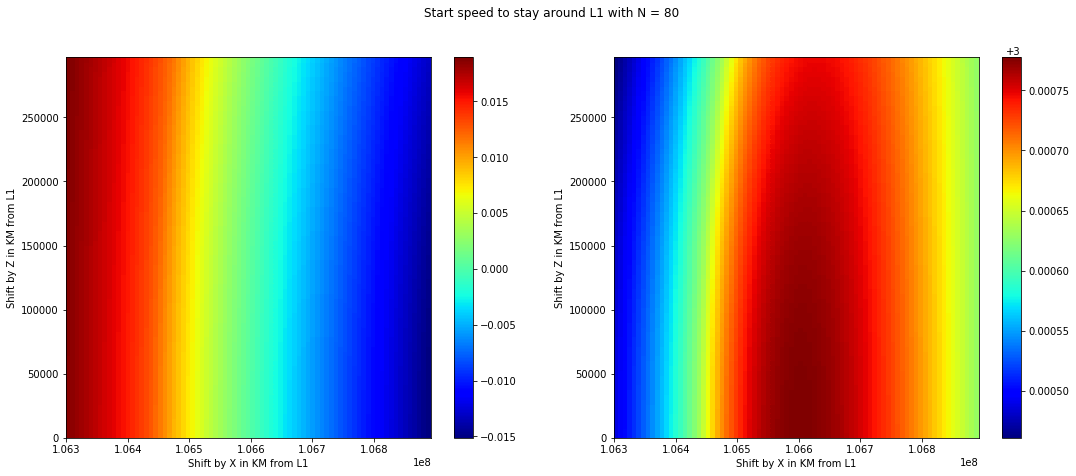

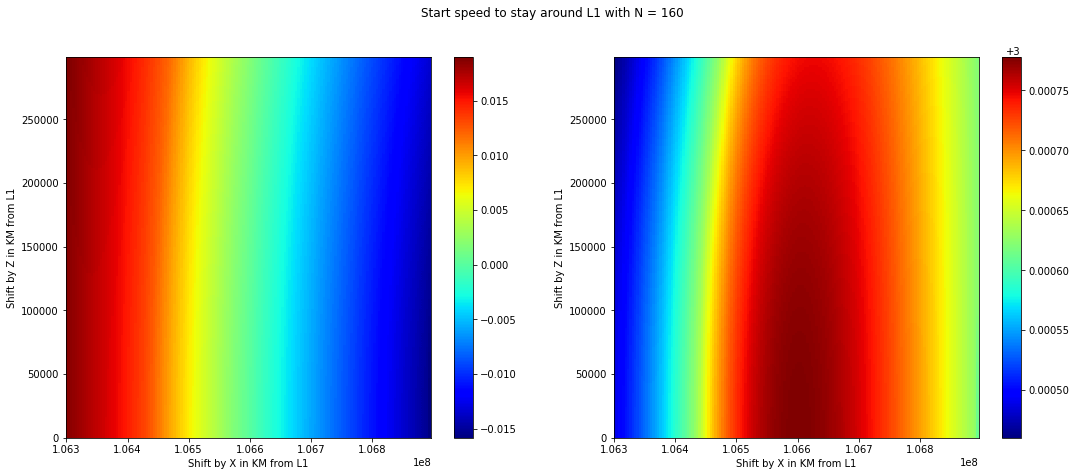

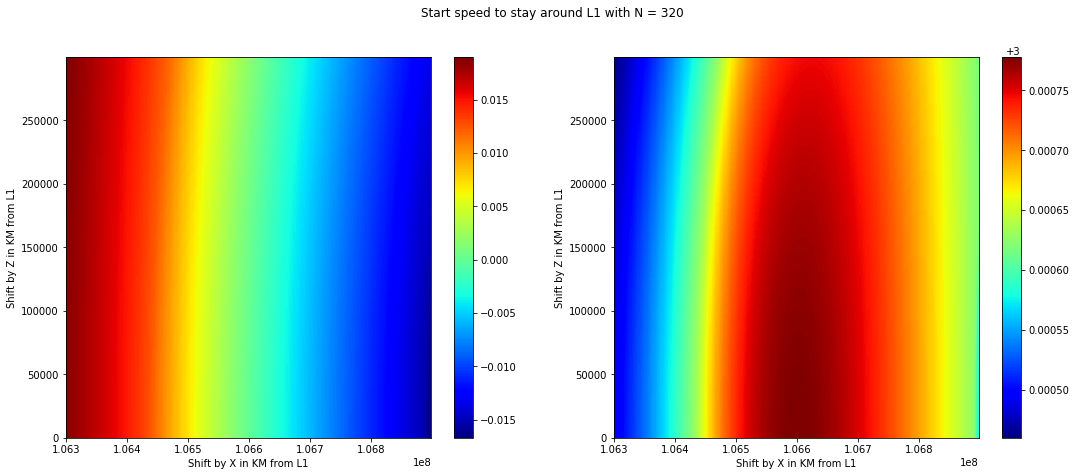

In [31]:
for N in [40, 80, 160, 320]:
    plot(N)

In [32]:
f = open('compute_time.txt', 'r')
for line in f:
    print(line)

21.673624992370605 seconds elapased for 40x40 grid

86.45749354362488 seconds elapased for 80x80 grid

361.56995463371277 seconds elapased for 160x160 grid

1408.986172914505 seconds elapased for 320x320 grid

6.212311744689941 seconds elapased for 20x20 grid
